## SVD(singular value decomposition)

- 행렬 분해 기법( 정방 행렬, 행과 열의 크기가 다른 행렬) , 특이값 분해로 불림

In [1]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


-> 행렬의 개별 로우끼리의 의존성이 없어짐 랜덤 행렬 a

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


## NMF( Non-Negative Matrix Factorization)

원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장 된다면, 두개의 기반 양수 행렬로 분해될 수 있는 기법

SVD와 유사하게 차원 축소를 통한 잠재 요소 도출

![nmf](./nmf.png)

4 * 6 원본 행렬 V ~  (4 * 2 행렬 W) 와 (2*6 행렬 H)로 근사해 분해

W(4 * 2 행렬) : 길고 가는 행렬, 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지에 대응


H(2*6 행렬) : 작고 넓은 행렬, 이 잠재 요소가 원본열로 어떻게 구성됐는지 나타내는 행렬

Text(0, 0.5, 'NMF Component 2')

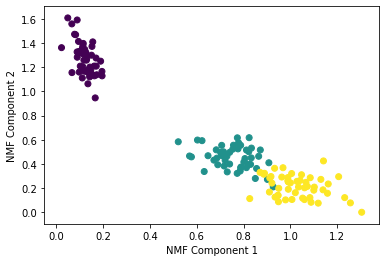

In [3]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

2개의 컴포넌트로 변환하고 시각화한 결과